In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import pandas as pd
import matplotlib.pyplot as plt

## Import site level data

In [2]:
PM_data2 = pd.read_csv('PM_data2/sites.txt',sep='\t',header=1)
PM_data2.columns

Index(['site', 'location', 'samples', 'specimens', 'age', 'age_high',
       'age_low', 'age_sigma', 'age_unit', 'dir_alpha95', 'dir_comp_name',
       'dir_dec', 'dir_inc', 'dir_k', 'dir_n_samples', 'dir_n_specimens_lines',
       'dir_n_specimens_planes', 'dir_polarity', 'dir_r',
       'dir_tilt_correction', 'lat', 'lon', 'analysts', 'criteria',
       'software_packages', 'citations', 'method_codes', 'result_quality',
       'result_type', 'vgp_dm', 'vgp_dp', 'vgp_lat', 'vgp_lon',
       'dir_n_specimens'],
      dtype='object')

In [4]:
PM_data2_HT = PM_data2[PM_data2.dir_comp_name == 'HT1']
PM_data2_HT_filtered = PM_data2_HT[PM_data2_HT.dir_alpha95 < 20]
PM_data2_HT_tc = PM_data2_HT_filtered[PM_data2_HT_filtered.dir_tilt_correction == 100]
PM_data2_HT_is = PM_data2_HT_filtered[PM_data2_HT_filtered.dir_tilt_correction == 0]

In [5]:
PM_data2_HT_tc.dir_dec.tolist()

[210.1, 111.1, 124.9, 149.0, 56.9, 129.1]

In [7]:
HT_tc_dec = PM_data2_HT_tc.dir_dec.tolist()
HT_tc_inc = PM_data2_HT_tc.dir_inc.tolist()
HT_tc_a95 = PM_data2_HT_tc.dir_alpha95.tolist()

HT_is_dec = PM_data2_HT_is.dir_dec.tolist()
HT_is_inc = PM_data2_HT_is.dir_inc.tolist()
HT_is_a95 = PM_data2_HT_is.dir_alpha95.tolist()

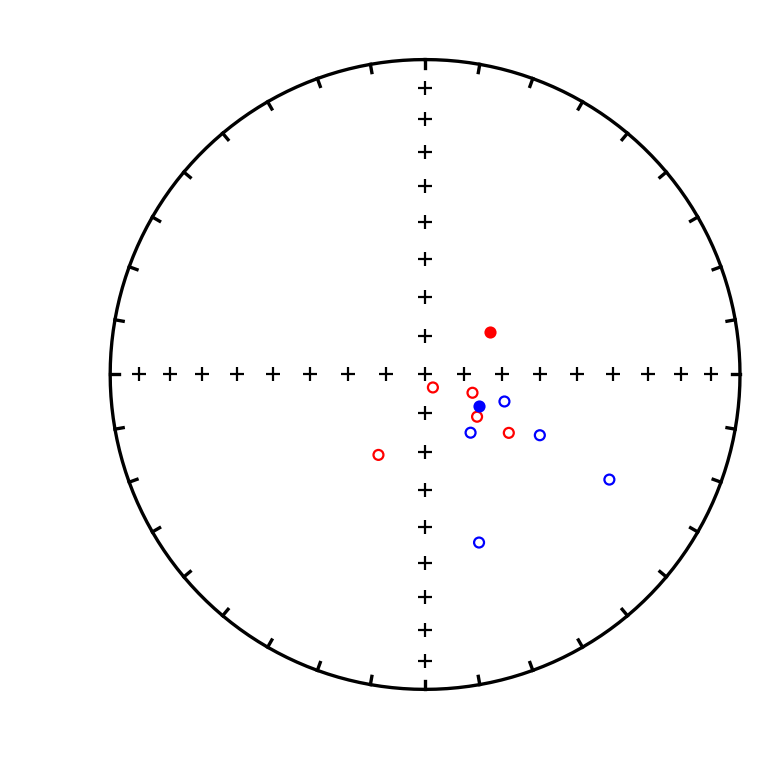

In [27]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5),dpi=160)
ipmag.plot_net(fignum)
ipmag.plot_di(HT_tc_dec, HT_tc_inc, color='red')
ipmag.plot_di(HT_is_dec, HT_is_inc, color='blue')
plt.show()

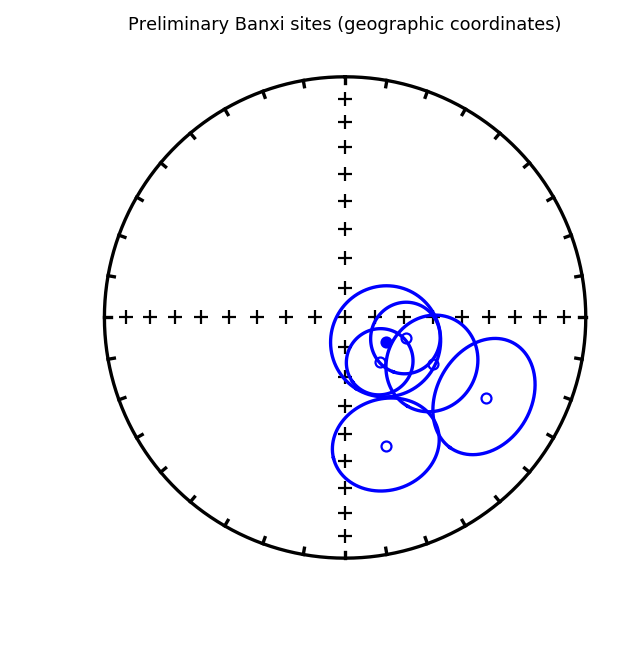

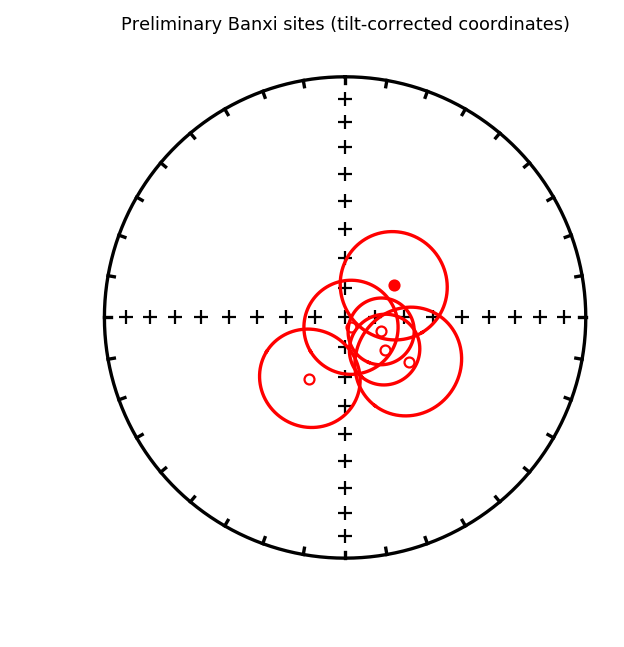

In [61]:
fignum = 1
plt.figure(num=fignum,figsize=(4,4),dpi=160)
ipmag.plot_net(fignum)
for i in range(0,len(PM_data2_HT_tc)):
    if HT_tc_a95[i] < 20:
        ipmag.plot_di_mean(HT_is_dec[i], HT_is_inc[i], HT_is_a95[i],color='blue')
plt.title('Preliminary Banxi sites (geographic coordinates)',fontsize=8)
plt.show()

fignum = 2
plt.figure(num=fignum,figsize=(4,4),dpi=160)
ipmag.plot_net(fignum)
for i in range(0,len(PM_data2_HT_tc)):
    if HT_tc_a95[i] < 20:
        ipmag.plot_di_mean(HT_tc_dec[i], HT_tc_inc[i], HT_tc_a95[i],color='red')
plt.title('Preliminary Banxi sites (tilt-corrected coordinates)',fontsize=8)
plt.show()

In [22]:
HT_is_inc_flipped = []
HT_is_dec_flipped = []
HT_tc_inc_flipped = []
HT_tc_dec_flipped = []

for n in range(0,len(HT_tc_dec)):
    if HT_tc_inc[n] > 0:
        HT_is_inc_flipped.append(-HT_is_inc[n])
        HT_is_dec_flipped.append(HT_is_dec[n]+180)
        HT_tc_inc_flipped.append(-HT_tc_inc[n])
        HT_tc_dec_flipped.append(HT_tc_dec[n]+180)
    else:
        HT_is_inc_flipped.append(HT_is_inc[n])
        HT_is_dec_flipped.append(HT_is_dec[n])
        HT_tc_inc_flipped.append(HT_tc_inc[n])
        HT_tc_dec_flipped.append(HT_tc_dec[n])

HT_tc_mean = ipmag.fisher_mean(HT_tc_dec_flipped,HT_tc_inc_flipped)
HT_is_mean = ipmag.fisher_mean(HT_is_dec_flipped,HT_is_inc_flipped)
ipmag.print_direction_mean(HT_tc_mean)
print('')
ipmag.print_direction_mean(HT_is_mean)

Dec: 162.5  Inc: -78.3
Number of directions in mean (n): 6
Angular radius of 95% confidence (a_95): 13.8
Precision parameter (k) estimate: 24.4

Dec: 132.4  Inc: -64.1
Number of directions in mean (n): 6
Angular radius of 95% confidence (a_95): 23.6
Precision parameter (k) estimate: 9.0


In [18]:
HT_tc_inc[0]

-65.9

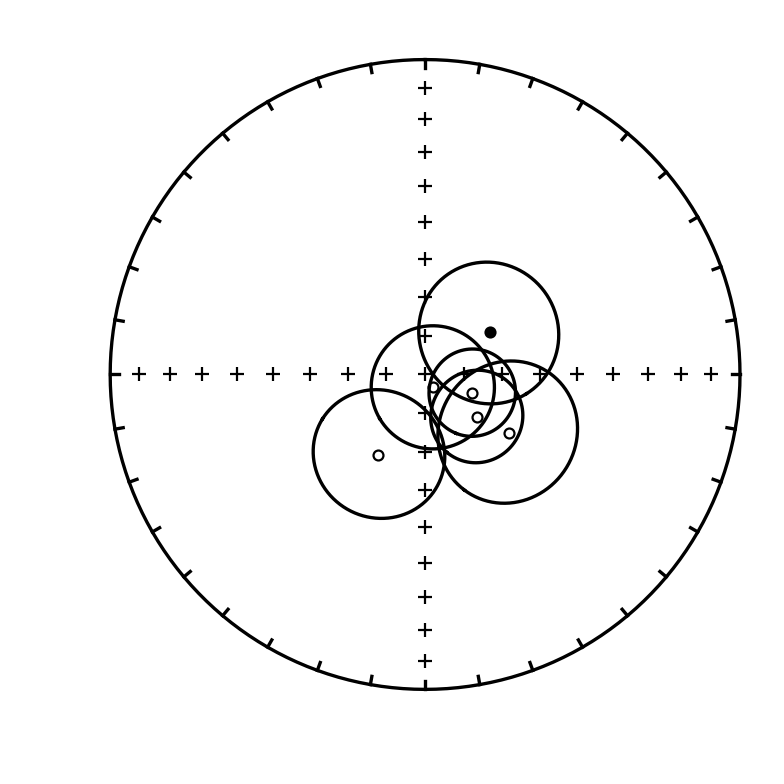

In [30]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5),dpi=160)
ipmag.plot_net(fignum)
for i in range(0,len(PM_data2_HT_tc)):
    if HT_tc_a95[i] < 20:
        ipmag.plot_di_mean(HT_tc_dec[i], HT_tc_inc[i], HT_tc_a95[i])

In [34]:
from mpl_toolkits.basemap import Basemap
import numpy as np
    
        

In [42]:
PM_data2_HT_tc.index

Int64Index([2, 6, 14, 18, 22, 30], dtype='int64')

In [52]:
PM_data2_vgp_lat = []
PM_data2_vgp_lon = []

for i in PM_data2_HT_tc.index:
    if PM_data2_HT_tc.dir_inc[i] > 0:
        PM_data2_vgp_lat.append(PM_data2_HT_tc.vgp_lat[i])
        PM_data2_vgp_lon.append(PM_data2_HT_tc.vgp_lon[i])
    else:
        PM_data2_vgp_lat.append(-PM_data2_HT_tc.vgp_lat[i])
        PM_data2_vgp_lon.append(PM_data2_HT_tc.vgp_lon[i]-180)
        
PM_data2_pole = ipmag.fisher_mean(dec=PM_data2_vgp_lon,inc=PM_data2_vgp_lat)
ipmag.print_pole_mean(PM_data2_pole)

Plon: 98.8  Plat: 48.3
Number of directions in mean (n): 6
Angular radius of 95% confidence (A_95): 24.8
Precision parameter (k) estimate: 8.3


In [48]:
PM_data2_vgp_lat

[59.2, 34.0, 43.5, 34.5, 41.5, 43.8]

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


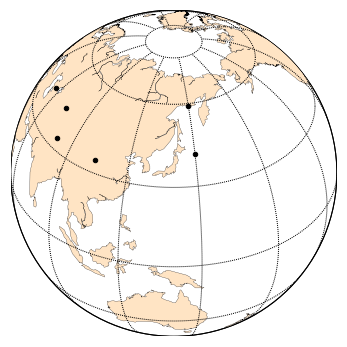

In [63]:
# initiate the figure
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=35,lon_0=140,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

ipmag.plot_vgp(pmap,vgp_lon=PM_data2_vgp_lon,vgp_lat=PM_data2_vgp_lat)
        

plt.show()

In [57]:
ipmag.lat_from_pole(PM_data2_HT_tc.lon[2],PM_data2_HT_tc.lat[2],PM_data2_pole['dec'],PM_data2_pole['inc'])

68.18060117613005

In [62]:
PM_data2_HT_tc.site

2     TR018
6     TR020
14    TR024
18    TR026
22    TR035
30    TR042
Name: site, dtype: object